## DE 개발 사전 과제 - 신입

### 라이브러리 

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

### 데이터 읽어오기

In [2]:
nov_data = pd.read_csv('./2019-Nov.csv')
nov_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


### 데이터 info

In [3]:
nov_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [4]:
nov_data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
...,...,...,...,...,...,...,...,...,...
67501974,2019-11-30 23:59:58 UTC,view,15700137,2053013559733912211,NaN,NaN,277.74,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b
67501975,2019-11-30 23:59:58 UTC,view,28719425,2053013565639492569,apparel.shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
67501976,2019-11-30 23:59:59 UTC,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
67501977,2019-11-30 23:59:59 UTC,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0


### 1. 해당 전체 기간에서, KST 기준으로 active user 수가 제일 큰 날짜를 구하세요



In [5]:
nov_data['event_time'] = nov_data["event_time"].replace('UTC', '', regex=True) #KST 변환을 위해 UTC 제거 
nov_data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
...,...,...,...,...,...,...,...,...,...
67501974,2019-11-30 23:59:58,view,15700137,2053013559733912211,NaN,NaN,277.74,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b
67501975,2019-11-30 23:59:58,view,28719425,2053013565639492569,apparel.shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
67501976,2019-11-30 23:59:59,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
67501977,2019-11-30 23:59:59,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0


In [6]:
format = '%Y-%m-%d %H:%M:%S' 
nov_data['event_time'] = pd.to_datetime(nov_data['event_time'], format=format) # str 형식을 datetime 형식으로 변환

In [7]:
nov_data['event_time'] = nov_data['event_time'] + datetime.timedelta(hours=9) #UTC KST 변환

In [8]:
nov_data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 09:00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 09:00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 09:00:01,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 09:00:01,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 09:00:01,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
...,...,...,...,...,...,...,...,...,...
67501974,2019-12-01 08:59:58,view,15700137,2053013559733912211,NaN,NaN,277.74,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b
67501975,2019-12-01 08:59:58,view,28719425,2053013565639492569,apparel.shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
67501976,2019-12-01 08:59:59,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
67501977,2019-12-01 08:59:59,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0


In [9]:
active_user_list = nov_data.loc[:,['event_time','user_id']] 
active_user_list['event_time'] = active_user_list['event_time'].dt.strftime('%Y-%m-%d') 
active_user_list = active_user_list.groupby(by=['event_time'], axis=0, as_index=False).agg({'user_id': pd.Series.nunique}) #중복 제거후 총합
active_user_list = active_user_list.sort_values(by=['user_id'], axis=0,ascending=False)[0:10].reset_index(drop=True) # user_id 별 내림차순 정렬후 날짜 출력
active_user_list['event_time'] = active_user_list['event_time'].astype(str)
bigDate = active_user_list['event_time'][0:1][0]
bigDate

'2019-11-17'

In [10]:
del active_user_list

### 2. 1의 날짜에서, 세션이 가장 긴 사용자 10명에 대해 "user_id, session_id, 세션시간"를 구하세요

In [11]:
bigDate_list = nov_data[nov_data['event_time'].dt.strftime('%Y-%m-%d') ==bigDate ] # 전체 데이터중 active user 수가 제일 큰 날짜 에 해당하는 데이터만 추출 

In [12]:
bigDate_list

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
37197680,2019-11-17 00:00:00,view,1005107,2053013555631882655,electronics.smartphone,apple,1039.92,513204188,20edad9e-c725-4cdf-9519-22b400233351
37197681,2019-11-17 00:00:00,view,1005239,2053013555631882655,electronics.smartphone,xiaomi,267.19,553857554,2d5f2702-de13-48c6-86bc-e9975125461c
37197682,2019-11-17 00:00:00,view,6000180,2053013560807654091,auto.accessories.alarm,starline,205.93,569930493,5efd8289-8268-4138-af9f-fbf49451d55b
37197683,2019-11-17 00:00:00,view,1005221,2053013555631882655,electronics.smartphone,xiaomi,288.01,522230366,fdddfbe0-bece-46aa-9c57-66efef984d3a
37197684,2019-11-17 00:00:00,purchase,38900048,2085718636156158307,NaN,brw,77.20,518496808,1cd1ae0b-bb9a-4974-be8d-d3af291ad465
...,...,...,...,...,...,...,...,...,...
43895184,2019-11-17 23:59:59,view,3900536,2053013552326770905,appliances.environment.water_heater,electrolux,118.38,518451111,8020aa8d-9a25-47d8-bf28-da4d9b13ef16
43895185,2019-11-17 23:59:59,view,5300128,2053013563173241677,NaN,rowenta,29.58,514822215,35ca3007-4766-4137-b392-f33221addfeb
43895186,2019-11-17 23:59:59,view,1201343,2172371436436455782,electronics.tablet,lenovo,180.16,513540069,13697709-ceb9-48bc-a6da-624bd9b12186
43895187,2019-11-17 23:59:59,purchase,42100000,2094006184079000416,NaN,stagg,127.42,549901620,659e2f4e-a4e1-442f-acb9-0d083628c9f8


In [13]:
session_list = bigDate_list.groupby(['user_session'])  # 세션 1개 이상을 해주는 이유는 최대 길이를 구하는 과정에서 세션이 1개를 경우 세션의 길이는 0이기 때문
session_list = session_list.filter(lambda x: len(x) > 1)

In [14]:
print(len(bigDate_list)) # 세션 길이가 1개 
print(len(session_list)) # 세션 길이가 1개 이상

6697509
6451436


In [15]:
session_min = session_list.groupby(['user_id','user_session'], as_index=False)['event_time'].agg(np.min) 
session_min

,user_id,user_session,event_time
0,439111345,225199cb-787c-d347-c622-d2d4415b928f,2019-11-17 22:18:04
1,439111345,54666004-9100-4007-9216-2507f3bda2cb,2019-11-17 01:09:13
2,439111345,912f8d54-941e-8837-0f30-b219ec40e9e8,2019-11-17 11:53:18
3,453022947,2e3b7694-ebfa-4421-ad4f-15ba984d459a,2019-11-17 13:03:32
4,474270349,3afcc52f-6ce8-47b4-92a5-d3c322ee58f2,2019-11-17 15:00:50
...,...,...,...
765997,572621861,9c8298ae-0f74-44cd-94b0-8faf02726ee5,2019-11-17 23:58:27
765998,572621922,8e939716-2b47-49f9-9f5c-54b07590a214,2019-11-17 23:58:26
765999,572622167,84123cab-07df-4bb8-8936-38898ce26ac6,2019-11-17 23:58:42
766000,572622189,e7541d94-8f19-46b3-a760-feaa13a09a85,2019-11-17 23:59:48


In [16]:
session_max = session_list.groupby(['user_id','user_session'], as_index=False)['event_time'].agg(np.max) 
session_max

,user_id,user_session,event_time
0,439111345,225199cb-787c-d347-c622-d2d4415b928f,2019-11-17 22:31:53
1,439111345,54666004-9100-4007-9216-2507f3bda2cb,2019-11-17 01:19:12
2,439111345,912f8d54-941e-8837-0f30-b219ec40e9e8,2019-11-17 12:47:00
3,453022947,2e3b7694-ebfa-4421-ad4f-15ba984d459a,2019-11-17 13:06:01
4,474270349,3afcc52f-6ce8-47b4-92a5-d3c322ee58f2,2019-11-17 23:57:51
...,...,...,...
765997,572621861,9c8298ae-0f74-44cd-94b0-8faf02726ee5,2019-11-17 23:59:29
765998,572621922,8e939716-2b47-49f9-9f5c-54b07590a214,2019-11-17 23:59:45
765999,572622167,84123cab-07df-4bb8-8936-38898ce26ac6,2019-11-17 23:59:57
766000,572622189,e7541d94-8f19-46b3-a760-feaa13a09a85,2019-11-17 23:59:52


In [17]:
session_max['event_time'] = session_max['event_time'] - session_min['event_time']

In [18]:
result = session_max.sort_values(by=['event_time'], axis=0,ascending=False)[0:10].reset_index(drop=True)
result

,user_id,user_session,event_time
0,565022209,a7c5906e-5dd8-4175-aeca-eb5615844e67,0 days 21:46:17
1,568848552,f2d487ec-1a93-47cd-916a-5e46db85472c,0 days 21:18:29
2,546179105,c28e0611-7590-49cb-9c19-1d4f6540592a,0 days 21:04:07
3,557268031,a7b1bde2-4493-4c4b-9517-8b8a0a9cf494,0 days 20:36:33
4,554760857,c5fc6a55-1735-4636-8490-b6dfd060164c,0 days 20:12:13
5,543658395,8c85d761-88c9-45f6-b844-4e506c58f9b3,0 days 19:56:09
6,532969916,1ffae9b4-50e0-4d76-b354-6df7b8d19445,0 days 19:27:38
7,544784642,cfd07110-7047-4ac5-bb17-a4cbd05a491b,0 days 18:32:19
8,561409785,a7db81e5-7d03-404b-806b-063148c86e1b,0 days 18:15:43
9,524688046,0193ea4b-88eb-40ad-bae9-2b00ecd1481f,0 days 18:12:19


### 3. 1의 날짜의 15분단위로 active user 수를 구하세요


In [30]:
year = bigDate_list.loc[:,['event_time','user_id']]

minute  = bigDate_list.loc[:,['event_time','user_id']]

#%Y-%m-%d %H:%M:%S 
minute['event_time'] = pd.to_datetime(minute['event_time'], format=format) # str 형식을 datetime 형식으로 변환
year['event_time'] = pd.to_datetime(year['event_time'], format=format) # str 형식을 datetime 형식으로 변환

minute['event_time'] = minute['event_time'].dt.strftime('%M:%S')
minute['event_time'] = minute['event_time'].mask(minute['event_time'] < '15:00', '00:00')
minute['event_time'] = minute['event_time'].mask((minute['event_time'] >= '15:00') & (minute['event_time'] < '30:00'), '15:00')
minute['event_time'] = minute['event_time'].mask( (minute['event_time'] >= '30:00') & (minute['event_time'] < '45:00'), '30:00')
minute['event_time'] = minute['event_time'].mask( (minute['event_time'] >= '45:00') & (minute['event_time'] < '59:59'), '45:00')

year['event_time'] = year['event_time'].dt.strftime('%Y-%m-%d %H:')

year['event_time']  = year['event_time']  + minute['event_time']

year = year.groupby(by=['event_time'], axis=0, as_index=False).agg({'user_id': pd.Series.nunique}) #중복 제거후 총합
year

,event_time,user_id
0,2019-11-17 00:00:00,18397
1,2019-11-17 00:15:00,17563
2,2019-11-17 00:30:00,14695
3,2019-11-17 00:45:00,16110
4,2019-11-17 00:59:59,74
...,...,...
114,2019-11-17 23:00:00,21609
115,2019-11-17 23:15:00,21676
116,2019-11-17 23:30:00,21796
117,2019-11-17 23:45:00,21897


### 4. 1의 날짜에서 view → cart → purchase 이벤트 진행에 따른 funnel 수치를 구하세요

- view,  cart, purchase 3개의 구간으로 구분을 해준다

In [20]:
funnel_dict = {'view':1,'cart':2,'purchase':3}
funnel_steps = pd.DataFrame.from_dict(funnel_dict,orient='index',columns=['step_no'])
funnel_steps

,step_no
view,1
cart,2
purchase,3


In [21]:
grouped = bigDate_list.groupby(['user_session','event_type'])['event_time'].agg(np.min) 
grouped = pd.DataFrame(grouped).merge(funnel_steps,left_on='event_type',right_index=True)
grouped

,,event_time,step_no
user_session,event_type,,
00000616-f016-4c01-b323-438486d9d3ee,view,2019-11-17 14:35:46,1
00002e0a-8b74-4c72-bb5a-99e04fa264da,view,2019-11-17 17:22:06,1
00004c44-9765-4216-aafd-0ede55aad240,view,2019-11-17 23:00:14,1
00005114-2d52-4a59-ac08-ec71bbaf24db,view,2019-11-17 22:28:30,1
00006a96-5e74-427a-97f9-5d9cdf4a2de1,view,2019-11-17 21:59:41,1
...,...,...,...
fffe04cb-aa10-468d-a4eb-873c19377644,purchase,2019-11-17 20:28:00,3
ffffb69f-e3f9-4271-876f-d894920fa911,purchase,2019-11-17 23:47:28,3
ffffde87-ca37-4bef-a2fb-6901472fd8c8,purchase,2019-11-17 19:59:07,3


In [22]:
funnel = grouped.reset_index().pivot(index='user_session',columns='step_no',values='event_time')
funnel

step_no,1,2,3
user_session,,,
00000616-f016-4c01-b323-438486d9d3ee,2019-11-17 14:35:46,NaT,NaT
00002e0a-8b74-4c72-bb5a-99e04fa264da,2019-11-17 17:22:06,NaT,NaT
00004c44-9765-4216-aafd-0ede55aad240,2019-11-17 23:00:14,NaT,NaT
00005114-2d52-4a59-ac08-ec71bbaf24db,2019-11-17 22:28:30,2019-11-17 22:31:26,NaT
00006a96-5e74-427a-97f9-5d9cdf4a2de1,2019-11-17 21:59:41,NaT,NaT
...,...,...,...
ffffee94-7d46-454c-b12b-19e6f78fa18b,2019-11-17 17:12:53,NaT,NaT
fffff1dc-0841-4b56-9658-d5dcdc8be2d0,2019-11-17 18:32:17,NaT,NaT
fffff736-405e-485f-ac84-6a622ef44329,2019-11-17 14:38:10,2019-11-17 14:38:12,2019-11-17 14:40:56


In [23]:
funnel.columns = funnel_steps.index
funnel

,view,cart,purchase
user_session,,,
00000616-f016-4c01-b323-438486d9d3ee,2019-11-17 14:35:46,NaT,NaT
00002e0a-8b74-4c72-bb5a-99e04fa264da,2019-11-17 17:22:06,NaT,NaT
00004c44-9765-4216-aafd-0ede55aad240,2019-11-17 23:00:14,NaT,NaT
00005114-2d52-4a59-ac08-ec71bbaf24db,2019-11-17 22:28:30,2019-11-17 22:31:26,NaT
00006a96-5e74-427a-97f9-5d9cdf4a2de1,2019-11-17 21:59:41,NaT,NaT
...,...,...,...
ffffee94-7d46-454c-b12b-19e6f78fa18b,2019-11-17 17:12:53,NaT,NaT
fffff1dc-0841-4b56-9658-d5dcdc8be2d0,2019-11-17 18:32:17,NaT,NaT
fffff736-405e-485f-ac84-6a622ef44329,2019-11-17 14:38:10,2019-11-17 14:38:12,2019-11-17 14:40:56


In [24]:
step_values = [funnel[column].notnull().sum() for column in funnel.columns]
step_values

[1007174, 235220, 119216]

In [25]:
funnel.columns

Index(['view', 'cart', 'purchase'], dtype='object')

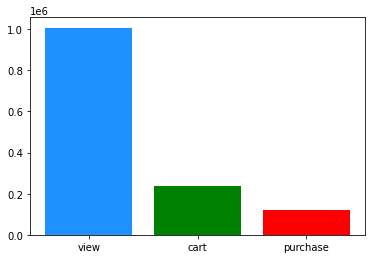

In [26]:
x = np.arange(3)
years = funnel.columns
values = step_values
colors = ['dodgerblue', 'g', 'r']

plt.bar(x, values, color=colors)
plt.xticks(x, years)

plt.show()

In [27]:
np.mean(funnel['cart']-funnel['view'])

Timedelta('0 days 00:06:38.114552827')

In [28]:
np.mean(funnel['purchase']-funnel['cart'])

Timedelta('0 days 00:03:47.103697452')

- view 에서 cart 까지 걸리는 시간은 평균적으로6분 38초가 발생했고
- cart 에서 purchase까지 걸리는 시간은 평균적으로 3분 47초가 발생했다